In [1]:
import sys
sys.path.insert(0, '/Volumes/data/LosAlamosSummer')
sys.path.insert(0, '/Volumes/data/LosAlamosSummer/DrOsborneCode')
import src.Utilities as ut
import importlib
import src.models as mod
import src.callbacks as cus
importlib.reload(ut)
importlib.reload(mod)
importlib.reload(cus)
import scipy
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers


In [2]:
print(np.logspace(2, 7, 6))

[1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07]


In [3]:
#datapath = '/Users/jessiejo/data/VBUDS/GroupStructurePaper/NeuralNetworks/All_Libraries/NewDataSetFull1.mat'
datapath='/Volumes/data/LosAlamosSummer/GODIVA/GODIVA_data_0_12.mat'
print('Loading In Data')
kinf,GS=ut.LoadData(datapath, 0)
#MakeGroupDensity(X, nDecades)
Nfeatures = 1000;


allData= ut.ProcessData(datapath, 1,Nfeatures,1,np.logspace(2, 7, Nfeatures),0)
# allData: (100,000x1,000) y_direct: (100,000x3)
print('Finished Loading Data')

Loading In Data
Finished Loading Data



Load Data loads raw data from the .mat file
Inputs
datapath: Path to .mat file containing the data [string]
BU: whether the data contains burnup; 1=burnup, 0=no burnup [bool]

ProcessData is the serialization maker 
Inputs
datapath: Path to .mat file containing the data [string]
Percent of data to be used: in most cases full data set will be used but good for analysis [double](0-1)
ndecades: Number of decades wanted in equal lethargy serialization. Number is ignored if custom serialization inputted [int]
mode: equal lethargy mode (0) or custom serialization mode (1) [boolean]
input serial: a custom serialization regime (ignored if mode is not 1) [numpy array]
BU: whether the data contains burnup; 1=burnup, 0=no burnup [bool]

In [4]:

print(kinf.shape)
print(allData.shape)
print(sum(allData[0,:]))

(50000,)
(50000, 999)
4.0


In [5]:
Nsamples,Ndecades = allData.shape
vldF=.1
testF=.2
normConst=1#np.linalg.norm(kinf)
y_norm=np.array(kinf/normConst)

X, X_test, y, y_test, vldF_corr = ut.makeFractions(Nsamples, vldF, testF, allData, y_norm, 0)


NtrainingSamples = int(Nsamples*(1 - testF))
tranValSplit=int(NtrainingSamples*(1-vldF_corr))
X_train=X[:tranValSplit,:]
y_train=y[:tranValSplit]
X_val=X[tranValSplit+1:,:]
y_val=y[tranValSplit+1:]
print(y_test.shape)
print(y_val.shape)
print(y_norm.shape)
print(y_train.shape)

(9999,)
(4999,)
(50000,)
(35000,)


makeFractions splits the data into appropriatly sized sets
Nsamples is the number of samples of the data set
vldF is the validation fraction
testF is the test fraction
allData is the set of serialzed group structures
y_norm is the kinfs that correspond to the serialized group structures (normalized or otherwise)
BU (the last input) is a boolean determining whether the data contains burnup [Boolean] (used in the same manner as previous)

In [6]:
batch_size=531
model = tf.keras.Sequential([
    layers.Dense(832, activation='relu', name='hidden_1', input_dim=999),
    layers.Dense(554, activation='relu',  name='hidden_2'),
    layers.Dense(1, activation='linear',name='output')])
model.compile(loss="MAE",metrics="MAE")
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 832)               832000    
_________________________________________________________________
hidden_2 (Dense)             (None, 554)               461482    
_________________________________________________________________
output (Dense)               (None, 1)                 555       
Total params: 1,294,037
Trainable params: 1,294,037
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='MAE',optimizer=tf.keras.optimizers.Adam(1e-3))
model.fit(X_train,y_train.T, epochs=800, batch_size=batch_size, verbose=1,validation_data=(X_val,y_val.T), callbacks=cus.callbacks())
model.compile(loss='MAE',optimizer=tf.keras.optimizers.Adam(1e-4))
model.fit(X_train,y_train.T, epochs=800, batch_size=batch_size, verbose=1,validation_data=(X_val,y_val.T), callbacks=cus.callbacks())
model.compile(loss='MAE',optimizer=tf.keras.optimizers.Adam(1e-5))
model.fit(X_train,y_train.T, epochs=800, batch_size=batch_size, verbose=1,validation_data=(X_val,y_val.T), callbacks=cus.callbacks())
model.compile(loss='MAE',optimizer=tf.keras.optimizers.Adam(1e-6))
model.fit(X_train,y_train.T, epochs=800, batch_size=batch_size, verbose=1,validation_data=(X_val,y_val.T), callbacks=cus.callbacks())

Epoch 1/800
66/66 [==============================] - 1s 20ms/step - loss: 0.1644 - val_loss: 0.0744
Epoch 2/800
66/66 [==============================] - 1s 18ms/step - loss: 0.0570 - val_loss: 0.0517
Epoch 3/800
66/66 [==============================] - 1s 18ms/step - loss: 0.0417 - val_loss: 0.0450
Epoch 4/800
66/66 [==============================] - 1s 18ms/step - loss: 0.0335 - val_loss: 0.0415
Epoch 5/800
66/66 [==============================] - 1s 18ms/step - loss: 0.0284 - val_loss: 0.0374
Epoch 6/800
66/66 [==============================] - 1s 18ms/step - loss: 0.0262 - val_loss: 0.0367
Epoch 7/800
66/66 [==============================] - 1s 19ms/step - loss: 0.0235 - val_loss: 0.0330
Epoch 8/800
66/66 [==============================] - 1s 19ms/step - loss: 0.0213 - val_loss: 0.0303
Epoch 9/800
66/66 [==============================] - 1s 17ms/step - loss: 0.0189 - val_loss: 0.0283
Epoch 10/800
66/66 [==============================] - 1s 20ms/step - loss: 0.0167 - val_loss: 0.0268

66/66 [==============================] - 1s 20ms/step - loss: 0.0038 - val_loss: 0.0100
Epoch 83/800
66/66 [==============================] - 1s 19ms/step - loss: 0.0041 - val_loss: 0.0100
Epoch 84/800
66/66 [==============================] - 1s 20ms/step - loss: 0.0039 - val_loss: 0.0101
Epoch 85/800
66/66 [==============================] - 1s 20ms/step - loss: 0.0039 - val_loss: 0.0099
Epoch 86/800
66/66 [==============================] - 1s 18ms/step - loss: 0.0039 - val_loss: 0.0100
Epoch 87/800
66/66 [==============================] - 1s 17ms/step - loss: 0.0038 - val_loss: 0.0098
Epoch 88/800
66/66 [==============================] - 1s 18ms/step - loss: 0.0037 - val_loss: 0.0099
Epoch 89/800
66/66 [==============================] - 1s 18ms/step - loss: 0.0038 - val_loss: 0.0102
Epoch 90/800
66/66 [==============================] - 1s 17ms/step - loss: 0.0035 - val_loss: 0.0101
Epoch 91/800
66/66 [==============================] - 1s 20ms/step - loss: 0.0036 - val_loss: 0.0098
Epo

66/66 [==============================] - 2s 36ms/step - loss: 0.0027 - val_loss: 0.0083
Epoch 163/800
66/66 [==============================] - 2s 35ms/step - loss: 0.0030 - val_loss: 0.0084
Epoch 164/800
66/66 [==============================] - 2s 33ms/step - loss: 0.0032 - val_loss: 0.0085
Epoch 165/800
66/66 [==============================] - 2s 33ms/step - loss: 0.0028 - val_loss: 0.0083
Epoch 166/800
66/66 [==============================] - 2s 33ms/step - loss: 0.0026 - val_loss: 0.0082
Epoch 167/800
66/66 [==============================] - 2s 31ms/step - loss: 0.0026 - val_loss: 0.0082
Epoch 168/800
66/66 [==============================] - 2s 31ms/step - loss: 0.0027 - val_loss: 0.0081
Epoch 169/800
66/66 [==============================] - 2s 32ms/step - loss: 0.0027 - val_loss: 0.0083
Epoch 170/800
66/66 [==============================] - 2s 30ms/step - loss: 0.0027 - val_loss: 0.0082
Epoch 171/800
66/66 [==============================] - 2s 30ms/step - loss: 0.0027 - val_loss: 0

66/66 [==============================] - 1s 21ms/step - loss: 0.0025 - val_loss: 0.0077
Epoch 243/800
66/66 [==============================] - 1s 21ms/step - loss: 0.0022 - val_loss: 0.0077
Epoch 244/800
66/66 [==============================] - 1s 21ms/step - loss: 0.0023 - val_loss: 0.0078
Epoch 245/800
66/66 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 0.0077
Epoch 246/800
66/66 [==============================] - 1s 21ms/step - loss: 0.0023 - val_loss: 0.0077
Epoch 247/800
66/66 [==============================] - 1s 21ms/step - loss: 0.0023 - val_loss: 0.0077
Epoch 248/800
66/66 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 0.0078
Epoch 249/800
66/66 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 0.0077
Epoch 250/800
66/66 [==============================] - 1s 20ms/step - loss: 0.0026 - val_loss: 0.0077
Epoch 251/800
66/66 [==============================] - 1s 20ms/step - loss: 0.0023 - val_loss: 0

In [8]:
y_predicted = model.predict(X_test)
metric = tf.keras.metrics.MeanSquaredError(name="mean_average_error", dtype=None)
metric.update_state(np.array(y_predicted*normConst),np.array(y_test.T*normConst))
print(metric.result().numpy())  
#print(y_predicted)

0.00020991769


In [9]:
from matplotlib import pyplot as plt
import numpy as np


In [10]:
print(y_predicted[:,0].shape)
print(y_test.shape)

(9999,)
(9999,)


(9999,)


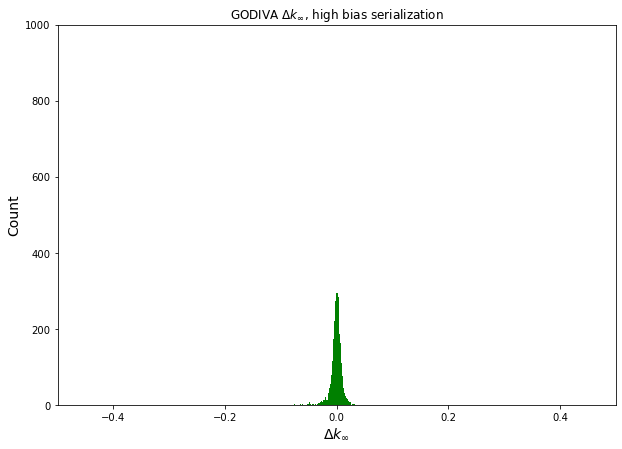

In [11]:
# Creating dataset
a = (y_predicted[:,0]-y_test)
print(a.shape)
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a,bins=500,label="BOL",color='g')
plt.xlabel("$Δk_{\infty}$", size=14)
plt.ylabel("Count", size=14)
plt.title("GODIVA $Δk_{\infty}$, high bias serialization")
#plt.legend(loc='upper right')
plt.xlim([-0.5,0.5])
plt.ylim([0,1000])

plt.savefig("../All_Results/GODIVA/GODIVA_deltaK_eqleth12.png",bbox_inches ="tight",
            pad_inches = 1,
            transparent = False,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')
# Show plot
plt.show()


In [12]:
print(np.std(y_test.T))
print(np.std(a))
print(np.mean(y_test.T))
print(np.mean(y_predicted))
print(len(y_test))
print(len(y_predicted))
print(len(a))
print(y_predicted)

0.06737911895538316
0.01440077788766054
1.0796179340080996
1.0780256
9999
9999
9999
[[1.0710818]
 [1.0409943]
 [1.0792836]
 ...
 [1.0507499]
 [1.0440333]
 [1.0840304]]


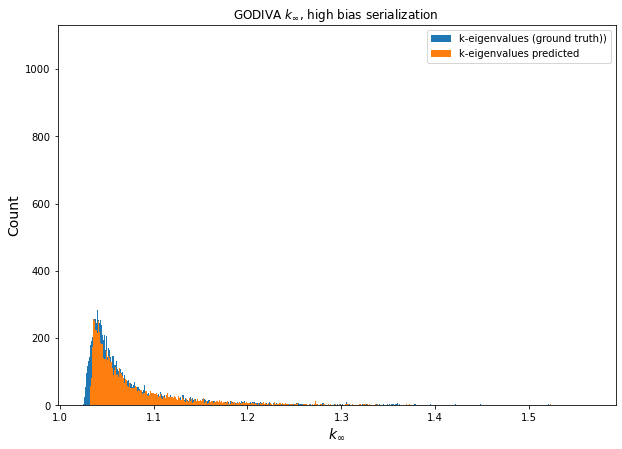

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
 

n_bins = 500
 

# Creating histogram
fig, axs = plt.subplots(figsize =(10, 7))
 
axs.hist(y_test.T, bins = n_bins,label="k-eigenvalues (ground truth))")
axs.hist(y_predicted, bins = n_bins,label="k-eigenvalues predicted")


plt.xlabel("$k_{\infty}$", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')

plt.title("GODIVA $k_{\infty}$, high bias serialization ")
plt.savefig("../All_Results/GODIVA/kinfDist_eqleth_12.png",bbox_inches ="tight",
            pad_inches = 1,
            transparent = False,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

plt.show()
# Show plot



In [14]:
np.max(y_test*normConst)-np.min(y_test*normConst)

0.540174245834351

In [15]:
np.min(y_test*normConst)

1.02492344379425

In [16]:
np.max(y_test*normConst)

1.565097689628601

In [17]:
np.sum(np.logical_and(kinf > 1.03146,kinf < 1.03546))


3279

In [18]:
np.shape(kinf)

(50000,)

In [19]:
np.mean(y_predicted)

1.0780256

In [20]:
np.median(y_predicted)

1.05515

In [21]:
np.max(y_predicted)

1.5231909